In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import re
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk

import spacy
import csv
from collections import defaultdict

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

In [2]:
cwd = os.getcwd()

In [3]:
df = pd.read_csv(cwd +"/BA_data.csv", index_col = 0)

In [4]:
df.head()

,reviews,stars,date,country
0,"Not Verified | I flew with numerous airlines, ...",5,16th June 2023,Romania
1,✅ Trip Verified | We were traveling as a fami...,1,13th June 2023,United States
2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,12th June 2023,Australia
3,✅ Trip Verified | Terrible. I have traveled t...,1,11th June 2023,United Kingdom
4,✅ Trip Verified | The customer service is ugl...,1,11th June 2023,United States


In [5]:
df["Verified"] = df.reviews.str.contains("Trip Verified")

In [6]:
df["Verified"]

0       False
1        True
2        True
3        True
4        True
        ...  
2895    False
2896    False
2897    False
2898    False
2899    False
Name: Verified, Length: 2900, dtype: bool

In [7]:
df = pd.read_csv("BA_data.csv", index_col=0)

df["Verified"] = df.reviews.str.contains("Trip Verified")

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus = []

for rev in reviews_data:
    rev = re.sub("[^a-zA-Z']", " ", rev)  # Replace non-alphabetic characters with a space
    rev = rev.lower()  # Convert to lowercase
    rev = rev.split()  # Split into individual words
    rev = [word for word in rev if word not in string.punctuation]  # Remove punctuation
    rev = " ".join(rev)  # Join the words back into a sentence
    corpus.append(rev)

In [8]:
df["corpus"] = corpus

In [9]:
df.head()

,reviews,stars,date,country,Verified,corpus
0,"Not Verified | I flew with numerous airlines, ...",5,16th June 2023,Romania,False,not verified i flew with numerous airlines but...
1,✅ Trip Verified | We were traveling as a fami...,1,13th June 2023,United States,True,we were traveling as a family people because o...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,12th June 2023,Australia,True,flight at am from dub to lcy cancelled pm nigh...
3,✅ Trip Verified | Terrible. I have traveled t...,1,11th June 2023,United Kingdom,True,ble i have traveled twice with them this year ...
4,✅ Trip Verified | The customer service is ugl...,1,11th June 2023,United States,True,he customer service is ugly tried calling two ...


In [10]:
df.dtypes

reviews     object
stars        int64
date        object
country     object
Verified      bool
corpus      object
dtype: object

In [11]:
df.date = pd.to_datetime(df.date)

In [12]:
df.date.head()

0   2023-06-16
1   2023-06-13
2   2023-06-12
3   2023-06-11
4   2023-06-11
Name: date, dtype: datetime64[ns]

In [13]:
df.stars.unique()

array([ 5,  1,  3,  4,  2,  9, 10,  7,  8,  6], dtype=int64)

In [14]:
df.stars.value_counts()

1     715
3     346
2     346
8     280
10    227
7     227
9     217
5     207
4     198
6     137
Name: stars, dtype: int64

In [15]:
df.isnull().value_counts()

reviews  stars  date   country  Verified  corpus
False    False  False  False    False     False     2900
dtype: int64

In [16]:
df.country.isnull().value_counts()

False    2900
Name: country, dtype: int64

In [17]:
df.shape

(2900, 6)

In [18]:
df.reset_index(drop=True)

,reviews,stars,date,country,Verified,corpus
0,"Not Verified | I flew with numerous airlines, ...",5,2023-06-16,Romania,False,not verified i flew with numerous airlines but...
1,✅ Trip Verified | We were traveling as a fami...,1,2023-06-13,United States,True,we were traveling as a family people because o...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight at am from dub to lcy cancelled pm nigh...
3,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble i have traveled twice with them this year ...
4,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,he customer service is ugly tried calling two ...
...,...,...,...,...,...,...
2895,BA662 31st March. BA662 14th April. BA makes u...,7,2015-04-23,United Kingdom,False,ba st march ba th april ba makes us think 'bet...
2896,BA 730 LHR-GVA 20 Apr 15. Are fooling no-one w...,9,2015-04-23,United Kingdom,False,ba lhr gva apr are fooling no one with their n...
2897,April 3 2015 Sydney-LHR. Staff were quite atte...,10,2015-04-23,Australia,False,april sydney lhr staff were quite attentive an...
2898,15th Aug 2014 flight BA0272. Me and my 3 frien...,10,2015-04-23,Turkey,False,th aug flight ba me and my friends flew from s...


In [19]:
df.to_csv('cleaned_reviews.csv')

In [20]:
df = pd.read_csv("cleaned_reviews.csv", index_col=0)

df = df.reset_index(drop=True)

In [21]:
df.head()

,reviews,stars,date,country,Verified,corpus
0,"Not Verified | I flew with numerous airlines, ...",5,2023-06-16,Romania,False,not verified i flew with numerous airlines but...
1,✅ Trip Verified | We were traveling as a fami...,1,2023-06-13,United States,True,we were traveling as a family people because o...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight at am from dub to lcy cancelled pm nigh...
3,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble i have traveled twice with them this year ...
4,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,he customer service is ugly tried calling two ...


In [22]:
# Create an empty dictionary to store word frequencies
word_frequencies = {}

# Iterate over each cleaned review in the corpus
for review in corpus:
    # Split the review into individual words
    words = review.split()
    
    # Count the frequency of each word
    for word in words:
        if word in word_frequencies:
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1

# Sort the word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 most frequent words
for word, frequency in sorted_word_frequencies[:10]:
    print(word, frequency)


the 23931
to 16157
and 14645
a 11403
was 10444
i 9188
in 7065
of 6873
on 6255
flight 5414


In [24]:

# Provide the path to the model directory
model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'

# Load the custom model
nlp = spacy.load(model_path)

# Function to extract nouns from a text
def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

# Path to the CSV file
csv_file_path = 'cleaned_reviews.csv'

# Column name to extract nouns from
column_name = 'corpus'

# Initialize a dictionary to store noun frequencies
noun_frequencies = defaultdict(int)

# Read the CSV file
with open(csv_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    # Process each row in the CSV file
    for row in csv_reader:
        # Extract the text from the specified column
        text = row[column_name]
        nouns = extract_nouns(text)
        for noun in nouns:
            noun_frequencies[noun] += 1

# Sort the noun frequencies in descending order
sorted_noun_frequencies = sorted(noun_frequencies.items(), key=lambda x: x[1], reverse=True)

# Print the sorted noun frequencies
#for noun, frequency in sorted_noun_frequencies:
    #print(noun, frequency)






C:\Users\pahar\anaconda3\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [24]:
math_sum = df['stars'].sum()

print(math_sum)

13146


In [25]:
2900*10

29000

In [27]:
13146/2900

4.533103448275862

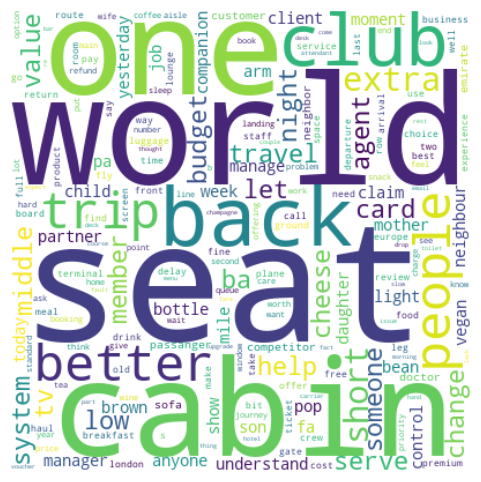

In [81]:

# Count the frequency of each word in the corpus
word_frequencies = {}
for review in corpus:
    words = review.split()
    for word in words:
        if word not in word_frequencies:
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

# Sort the word frequencies in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Define a list of words to omit from the word cloud
words_to_omit = ["husband",'ba', "sister", "day","selection", "person",'flight', 'airline', 'bag', '1hr','airway', 'airport', 'hour', 'heathrow', 'airport', 'flights', 'minute', 'day', 'airline', 'hours','airways','t', 'aircraft', 'passenger', '1hr','world', 'check', 'good','customer','phone','new']
  # Add the words you want to omit here

# Convert the word frequencies to a string format for word cloud input,
# excluding the words to omit
wordcloud_text = ' '.join([word for word, freq in sorted_word_frequencies if word not in words_to_omit])

# Generate the word cloud
wordcloud = WordCloud(width=400, height=400, background_color='white').generate(wordcloud_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


rate 10 word cloud

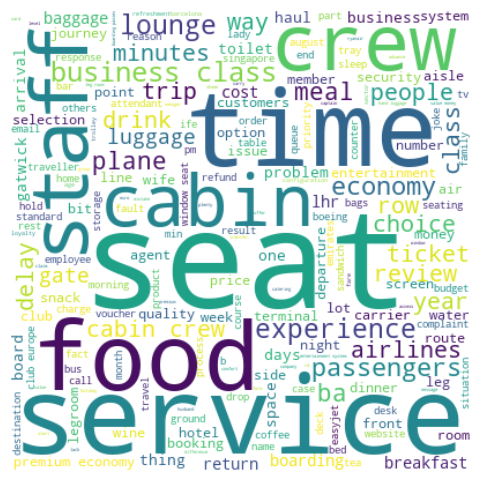

In [83]:


# Provide the path to the model directory
model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'


# Customize the list of stopwords to omit from the word cloud
custom_omit = ['flight', 'airline', 'bag', '1hr','airway', 'airport', 'hour', 'heathrow', 'airport', 'flights', 'minute', 'day', 'airline', 'hours','airways','t', 'aircraft', 'passenger', '1hr','world', 'check', 'good','customer','phone','new','london']
  # Add the words you want to omit here

# Add the custom omission list to the default stopwords
stopwords = set(STOPWORDS).union(custom_omit)

# Load the custom model
nlp = spacy.load(model_path)

# Filter the DataFrame to select only the 10-star reviews if available
ten_star_reviews = df[df['stars'] == 10]['corpus']

if len(ten_star_reviews) > 0:
    # Concatenate the reviews into a single string
    text = ' '.join(ten_star_reviews)

    # Function to extract nouns from a text using SpaCy
    def extract_nouns(text):
        doc = nlp(text)
        nouns = [token.text for token in doc if token.pos_ == 'NOUN']
        return nouns

    # Apply the function to extract nouns from the text
    nouns = extract_nouns(text)

    if len(nouns) > 0:
        # Join the extracted nouns into a single string
        nouns_text = ' '.join(nouns)

        # Generate the word cloud with only nouns, omitting custom stopwords
        wordcloud = WordCloud(width=400, height=400,background_color='white', stopwords=stopwords).generate(nouns_text)

        # Plot the word cloud
        plt.figure(figsize=(6,6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("No nouns found in the 10-star rated reviews.")
else:
    print("No reviews with a 10-star rating found.")



CUSTOM 1 RATE WORD CLOUD

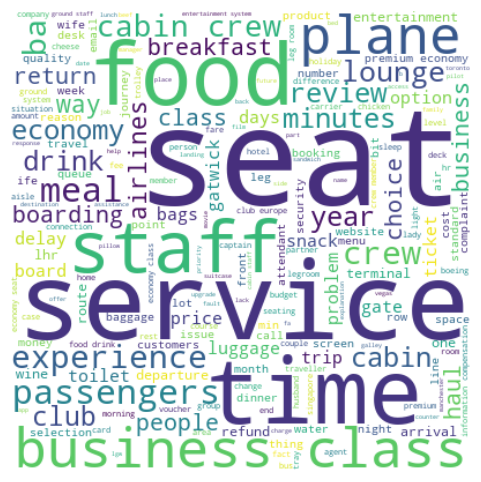

In [84]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

# Provide the path to the model directory
model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'


# Customize the list of stopwords to omit from the word cloud
custom_omit = ['flight', 'airline', 'bag', '1hr','airway', 'airport', 'hour', 'heathrow', 'airport', 'flights', 'minute', 'day', 'airline', 'hours','airways','t', 'aircraft', 'passenger','world', 'check', 'good','customer','phone','new','london']

# Add the custom omission list to the default stopwords
stopwords = set(STOPWORDS).union(custom_omit)

# Load the custom model
nlp = spacy.load(model_path)

# Filter the DataFrame to select only the 10-star reviews if available
ten_star_reviews = df[df['stars'] == 1]['corpus']

if len(ten_star_reviews) > 0:
    # Concatenate the reviews into a single string
    text = ' '.join(ten_star_reviews)

    # Function to extract nouns from a text using SpaCy
    def extract_nouns(text):
        doc = nlp(text)
        nouns = [token.text for token in doc if token.pos_ == 'NOUN']
        return nouns

    # Apply the function to extract nouns from the text
    nouns = extract_nouns(text)

    if len(nouns) > 0:
        # Join the extracted nouns into a single string
        nouns_text = ' '.join(nouns)

        # Generate the word cloud with only nouns, omitting custom stopwords
        wordcloud = WordCloud(width=400, height=400, background_color='white', stopwords=stopwords).generate(nouns_text)

        # Plot the word cloud
        plt.figure(figsize=(6, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("No nouns found in the 1-star rated reviews.")
else:
    print("No reviews with a 1-star rating found.")


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import spacy
model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'


# Load the SpaCy English model
nlp = spacy.load(model_path)

# Read the 'cleaned_reviews.csv' file
df = pd.read_csv('cleaned_reviews.csv')

# Extract the 'corpus' column from the DataFrame
corpus = df['corpus']

# Join the text from the 'corpus' column into a single string
reviews = " ".join(corpus)

# Tokenize the text into a list of words
vectorizer = CountVectorizer()
words = vectorizer.build_tokenizer()(reviews)

# Define a list of stopwords (common words to be removed)
stopwords = ['the', 'is', 'and', 'to', 'of', 'a', 'in', 'i', 'it', 'that','we', 'were','not verified', 'verified', 'british airways','flight', 'airline', 'bag', '1hr','airway', 'airport', 'hour', 'heathrow', 'airport', 'flights', 'minute', 'day', 'airline', 'hours','airways','t', 'aircraft', 'passenger']


# Remove stopwords from the list of words
new_words = [word for word in words if word.lower() not in stopwords]

# Function to extract nouns from a text using SpaCy
def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

# Apply the function to extract nouns from the text
nouns = extract_nouns(" ".join(new_words))

def get_freq_dist(words, number_of_ngrams):
    # Generate n-grams
    ngrams = [tuple(nouns[i:i+number_of_ngrams]) for i in range(len(nouns)-number_of_ngrams+1)]
    
    # Create a frequency distribution of the n-grams
    ngram_fd = Counter(ngrams)
    
    # Sort the frequency distribution by highest frequency
    ngram_sorted = sorted(ngram_fd.items(), key=lambda item: item[1], reverse=True)
    
    # Join the bigram tokens while maintaining the sorting
    ngram_joined = [' '.join(ngram[0]) for ngram in ngram_sorted]
    
    # Convert the frequency distribution to a Pandas Series for easy plotting
    ngram_series = pd.Series([ngram[1] for ngram in ngram_sorted], index=ngram_joined)
    
    return ngram_series

# Set the number of n-grams you want to analyze
number_of_ngrams = 2

# Get the frequency distribution of the n-grams
ngram_freqdist = get_freq_dist(nouns, number_of_ngrams)

# Plot the frequency distribution as a bar plot
#plt.figure(figsize=(10, 10))
top_30_sentences = ngram_freqdist.head(30)

# Plot the frequency distribution of the top 20 sentences as a bar plot
ax = top_30_sentences.plot(kind='bar', x='N-gram', y='Frequency')
plt.show()


ValueError: [E088] Text of length 2081551 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

C:\Users\pahar\anaconda3\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


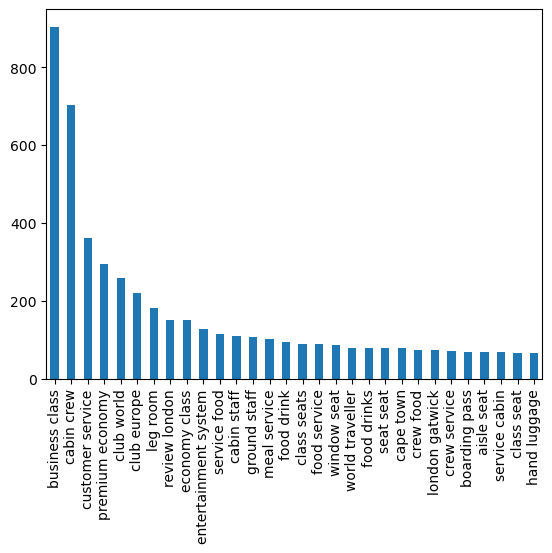

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import spacy

model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'

# Load the SpaCy English model
nlp = spacy.load(model_path)

# Read the 'cleaned_reviews.csv' file
df = pd.read_csv('cleaned_reviews.csv')

# Extract the 'corpus' column from the DataFrame
corpus = df['corpus']

# Join the text from the 'corpus' column into a single string
reviews = " ".join(corpus)

# Split the text into smaller chunks
chunk_size = 1000000
chunks = [reviews[i:i+chunk_size] for i in range(0, len(reviews), chunk_size)]

# Tokenize the text into a list of words for each chunk
vectorizer = CountVectorizer()
words_list = [vectorizer.build_tokenizer()(chunk) for chunk in chunks]

# Define a list of stopwords (common words to be removed)
stopwords = ['the', 'is', 'and', 'to', 'of', 'a', 'in', 'i', 'it', 'that','we', 'were','not verified', 'verified', 'british airways','flight', 'airline', 'bag', '1hr','airway', 'airport', 'hour', 'heathrow', 'airport', 'flights', 'minute', 'day', 'airline', 'hours','airways','t', 'aircraft', 'passenger']

# Remove stopwords from the list of words for each chunk
new_words_list = [[word for word in words if word.lower() not in stopwords] for words in words_list]

# Function to extract nouns from a text using SpaCy
def extract_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

# Apply the function to extract nouns from each chunk of text
nouns_list = [extract_nouns(" ".join(words)) for words in new_words_list]

# Merge the lists of nouns into a single list
nouns = [noun for sublist in nouns_list for noun in sublist]

def get_freq_dist(words, number_of_ngrams):
    # Generate n-grams
    ngrams = [tuple(nouns[i:i+number_of_ngrams]) for i in range(len(nouns)-number_of_ngrams+1)]
    
    # Create a frequency distribution of the n-grams
    ngram_fd = Counter(ngrams)
    
    # Sort the frequency distribution by highest frequency
    ngram_sorted = sorted(ngram_fd.items(), key=lambda item: item[1], reverse=True)
    
    # Join the bigram tokens while maintaining the sorting
    ngram_joined = [' '.join(ngram[0]) for ngram in ngram_sorted]
    
    # Convert the frequency distribution to a Pandas Series for easy plotting
    ngram_series = pd.Series([ngram[1] for ngram in ngram_sorted], index=ngram_joined)
    
    return ngram_series

# Set the number of n-grams you want to analyze
number_of_ngrams = 2

# Get the frequency distribution of the n-grams
ngram_freqdist = get_freq_dist(nouns, number_of_ngrams)

# Plot the frequency distribution as a bar plot
top_30_sentences = ngram_freqdist.head(30)

# Plot the frequency distribution of the top 20 sentences as a bar plot
ax = top_30_sentences.plot(kind='bar', x='N-gram', y='Frequency')
plt.show()


In [90]:
import spacy
from spacy.lang.en import English
from spacy.symbols import ADJ, VERB, NOUN, ADV
model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'



# Load the SpaCy English model
nlp = spacy.load(model_path)


def pos_tagging(text):
    doc = nlp(text)
    pos_data = [(token.text, token.pos_) for token in doc]
    return pos_data

df['POS tagged'] = df['corpus'].apply(pos_tagging)
df.head()

C:\Users\pahar\anaconda3\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


,Unnamed: 0,reviews,stars,date,country,Verified,corpus,POS tagged
0,0,"Not Verified | I flew with numerous airlines, ...",5,2023-06-16,Romania,False,not verified i flew with numerous airlines but...,"[(not, PART), (verified, VERB), (i, PRON), (fl..."
1,1,✅ Trip Verified | We were traveling as a fami...,1,2023-06-13,United States,True,we were traveling as a family people because o...,"[(we, PRON), (were, AUX), (traveling, VERB), (..."
2,2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight at am from dub to lcy cancelled pm nigh...,"[(flight, NOUN), (at, ADP), (am, NOUN), (from,..."
3,3,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble i have traveled twice with them this year ...,"[(ble, INTJ), (i, PRON), (have, AUX), (travele..."
4,4,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,he customer service is ugly tried calling two ...,"[(he, PRON), (customer, NOUN), (service, NOUN)..."


In [91]:
import spacy
from spacy.lang.en import English
from spacy.symbols import ADJ, VERB, NOUN, ADV

model_path = r'C:\Users\pahar\Downloads\en_core_web_sm-3.0.0\en_core_web_sm\en_core_web_sm-3.0.0'


# Load the SpaCy English model
nlp = spacy.load(model_path)

def lemmatize(pos_data):
    lemma_rew = []
    for word, pos in pos_data:
        if not pos:
            lemma = word
        else:
            token = nlp(word)
            lemma = token[0].lemma_
        lemma_rew.append(lemma)
    return " ".join(lemma_rew)

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()


C:\Users\pahar\anaconda3\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


,Unnamed: 0,reviews,stars,date,country,Verified,corpus,POS tagged,Lemma
0,0,"Not Verified | I flew with numerous airlines, ...",5,2023-06-16,Romania,False,not verified i flew with numerous airlines but...,"[(not, PART), (verified, VERB), (i, PRON), (fl...",not verify I fly with numerous airline but I g...
1,1,✅ Trip Verified | We were traveling as a fami...,1,2023-06-13,United States,True,we were traveling as a family people because o...,"[(we, PRON), (were, AUX), (traveling, VERB), (...",we be travel as a family people because of an ...
2,2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight at am from dub to lcy cancelled pm nigh...,"[(flight, NOUN), (at, ADP), (am, NOUN), (from,...",flight at be from dub to lcy cancel pm night b...
3,3,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble i have traveled twice with them this year ...,"[(ble, INTJ), (i, PRON), (have, AUX), (travele...",ble I have travel twice with they this year vi...
4,4,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,he customer service is ugly tried calling two ...,"[(he, PRON), (customer, NOUN), (service, NOUN)...",he customer service be ugly try call two week ...


In [92]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Not Verified | I flew with numerous airlines, ...",not verify I fly with numerous airline but I g...
1,✅ Trip Verified | We were traveling as a fami...,we be travel as a family people because of an ...
2,✅ Trip Verified | Flight at 8.40am from DUB to...,flight at be from dub to lcy cancel pm night b...
3,✅ Trip Verified | Terrible. I have traveled t...,ble I have travel twice with they this year vi...
4,✅ Trip Verified | The customer service is ugl...,he customer service be ugly try call two week ...
...,...,...
2895,BA662 31st March. BA662 14th April. BA makes u...,ba st march ba th april ba make we think ' wel...
2896,BA 730 LHR-GVA 20 Apr 15. Are fooling no-one w...,ba lhr gva apr be fool no one with their new c...
2897,April 3 2015 Sydney-LHR. Staff were quite atte...,april sydney lhr staff be quite attentive and ...
2898,15th Aug 2014 flight BA0272. Me and my 3 frien...,th aug flight ba I and my friend fly from san ...


In [94]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,stars,date,country,Verified,corpus,POS tagged,Lemma,Sentiment,Analysis
0,0,"Not Verified | I flew with numerous airlines, ...",5,2023-06-16,Romania,False,not verified i flew with numerous airlines but...,"[(not, PART), (verified, VERB), (i, PRON), (fl...",not verify I fly with numerous airline but I g...,0.5719,Positive
1,1,✅ Trip Verified | We were traveling as a fami...,1,2023-06-13,United States,True,we were traveling as a family people because o...,"[(we, PRON), (were, AUX), (traveling, VERB), (...",we be travel as a family people because of an ...,0.3535,Neutral
2,2,✅ Trip Verified | Flight at 8.40am from DUB to...,3,2023-06-12,Australia,True,flight at am from dub to lcy cancelled pm nigh...,"[(flight, NOUN), (at, ADP), (am, NOUN), (from,...",flight at be from dub to lcy cancel pm night b...,-0.9605,Negative
3,3,✅ Trip Verified | Terrible. I have traveled t...,1,2023-06-11,United Kingdom,True,ble i have traveled twice with them this year ...,"[(ble, INTJ), (i, PRON), (have, AUX), (travele...",ble I have travel twice with they this year vi...,-0.8591,Negative
4,4,✅ Trip Verified | The customer service is ugl...,1,2023-06-11,United States,True,he customer service is ugly tried calling two ...,"[(he, PRON), (customer, NOUN), (service, NOUN)...",he customer service be ugly try call two week ...,-0.6908,Negative


In [95]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1374
Negative    1249
Neutral      277
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x229ea4177c0>,
 [Text(0.09046230148445852, 1.0962739493439289, 'Positive'),
  Text(-0.41047089442156615, -1.0205457583238293, 'Negative'),
  Text(1.289673813414573, -0.3990506922594084, 'Neutral')],
 [Text(0.049343073536977373, 0.597967608733052, '47.4%'),
  Text(-0.22389321513903607, -0.5566613227220886, '43.1%'),
  Text(0.8120168454832497, -0.2512541395707386, '9.6%')])

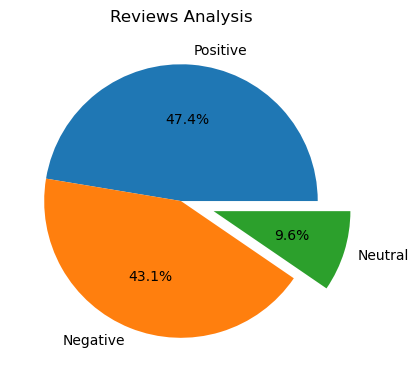

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

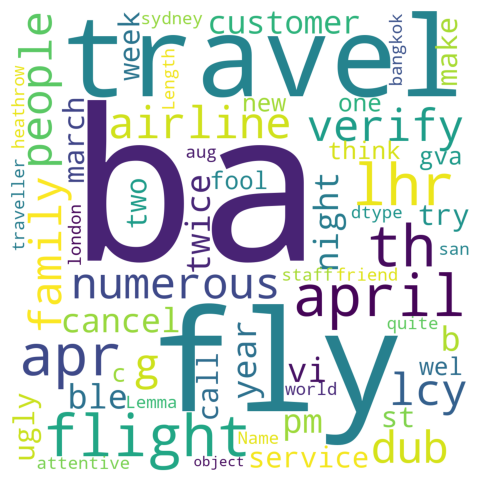

In [104]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(width=400, height=400,
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        #max_font_size=30,
        scale= 3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(6, 6))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [105]:
df[['country']]

,country
0,Romania
1,United States
2,Australia
3,United Kingdom
4,United States
...,...
2895,United Kingdom
2896,United Kingdom
2897,Australia
2898,Turkey


In [106]:
import pandas as pd

# Load the country frequency data into a DataFrame
data = df[['country']]  # Replace 'country_frequency_data.csv' with your data file

# Display the first few rows of the DataFrame
print(data.head())


          country
0         Romania
1   United States
2       Australia
3  United Kingdom
4   United States


In [108]:
country_freq = df['country'].value_counts().reset_index()
country_freq.columns = ['country', 'frequency']
print(country_freq)

                  country  frequency
0          United Kingdom       1807
1           United States        326
2               Australia        110
3                  Canada         92
4                 Germany         54
..                    ...        ...
62             Costa Rica          1
63         Cayman Islands          1
64                 Panama          1
65  Saint Kitts and Nevis          1
66                Ukraine          1

[67 rows x 2 columns]


In [110]:
import geopandas as gpd

import pandas as pd

# Assuming you have a DataFrame named 'df' with a 'country' column
country_frequency_data = df['country'].value_counts().reset_index()
country_frequency_data.columns = ['country', 'frequency']


# Fetch the country boundaries data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country frequency data with the country boundaries data
merged_data = world.merge(country_frequency_data, left_on='name', right_on='country', how='left')

# Create a map
map = folium.Map(location=[latitude, longitude], zoom_start=zoom)

# Create a choropleth map layer
folium.Choropleth(
    geo_data=merged_data,
    name='Country Frequency',
    data=country_frequency_data,
    columns=['country', 'frequency'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Country Frequency'
).add_to(map)

# Display the map
map.save('country_frequency_map.html')


C:\Users\pahar\AppData\Local\Temp\ipykernel_10872\2293785507.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


C:\Users\pahar\AppData\Local\Temp\ipykernel_10872\648792887.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

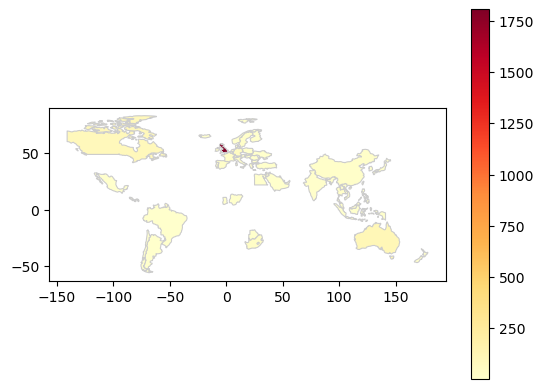

In [111]:
import geopandas as gpd

# Download the 'naturalearth_lowres' dataset
gpd.datasets.available

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the country frequency data with the world dataset
merged_data = world.merge(country_frequency_data, left_on='name', right_on='country', how='left')

# Create a choropleth map
map = gpd.GeoDataFrame(merged_data)

# Plot the choropleth map
map.plot(column='frequency', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)


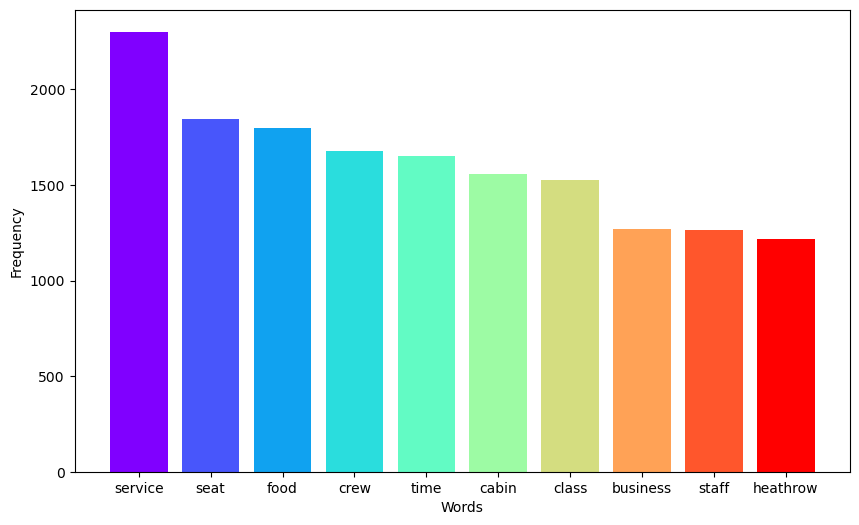

In [118]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
# Customize the list of words to omit
omit_words = ['flight', 'airways', 'seats']

# Initialize a dictionary to store noun frequencies
noun_frequencies = defaultdict(int)

# Read the CSV file
with open('cleaned_reviews.csv', 'r') as file:
    csv_reader = csv.DictReader(file)

    # Process each row in the CSV file
    for row in csv_reader:
        # Extract the text from the specified column
        text = row[column_name]
        nouns = extract_nouns(text)
        for noun in nouns:
            # Check if the noun is not in the omit words list
            if noun not in omit_words:
                noun_frequencies[noun] += 1

# Sort the noun frequencies in descending order
sorted_noun_frequencies = sorted(noun_frequencies.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 most used nouns
top_10_nouns = sorted_noun_frequencies[:10]

# Extract the nouns and frequencies for plotting
nouns = [noun for noun, freq in top_10_nouns]
frequencies = [freq for noun, freq in top_10_nouns]

colors = plt.cm.rainbow(np.linspace(0, 1, len(nouns)))

# Plot the noun frequencies as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(nouns, frequencies, color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
#plt.title('Top 10 Most Used Nouns')
#plt.xticks(rotation=45)
plt.show()
